# medication writing by Doctors 
In this project, we will try to predict if the doctor will write the medicine or not, depending on many features. This project is a real-life project that could be utilized in the field of Pharmacy or for the medication Manufacturer Companies.

## Featureset Exploration
### Input Data fields (Features and Labels)
The input data consists of 390 samples collected from 253 doctors.
This data will be used for training and validation test in a file
named medical attached with the project proposal.
Every sample consists of 7 features and 1 label(the output target).
* **medicine:** The commercial name of the medicine that I refer to it as type1 to type6.
* **Price:** price for every drug of these 6 drugs for patient.
* **exam_price:** examination price that the doctor takes from the patient.
* **clinic_hos:** classification if this doctor has a private 'clinic' or works in a 'hospital'.
* **dr_class:** doctor class was classified according to number of patients for every doctor and how much is this doctor famous and it was classified to 'a' and 'b'.

**where:**

* **class a:** are doctors with high patient rate
* **class b:** are doctors with medium patient rate
* **area:** every medical representative cover some areas in a city where the medical representative has to make a lot of visits for alot of doctors in different places and I refer to each area with the name (area1 to area8)with total 8 areas that I have covered to make my prospection.
* **specialty:** the specialty of the doctor is one of the most important features because it will determine which of the 6 drugs will be suitable for this doctor to write it in his prescription. 

**These specialties are:**
* **Chest:** chest specialist
* **Im:** internal medicine specialist
* **Cd:** cardiology specialist
* **Neuro:** neurology specialist
* **Git:** gastrointestinal tract specialist
* **Ent:** ear, nose and throat specialist
* **Sur:** surgery specialist
* **Uro:** urology specialist
* **Gp:** general practitioner
* **Or:** orthopedic specialist
* **Vas:** vascular specialst

**With total 11 specialties.**

* **Target (label):** just one target to classify if this doctor write any of these drugs in prescription to his patients or not. With (1) if the doctor writes the drug in his prescription and (0)if not.

In [2]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py




import seaborn as sb
import seaborn as sns

# Load the dataset
in_file = 'training.txt'
full_data = pd.read_csv(in_file)
print(full_data.shape)
# Print the first few entries of the RMS Titanic data
display(full_data.head())
full_data=full_data
full_data=full_data.fillna(np.mean(full_data))

(390, 8)


,medicine,area,speciality,price,dr_class,exam_price,clinic_hos,write
0,type1,area1,chest,45,a,200,clinic,1
1,type4,area2,im,36,b,100,clinic,1
2,type1,area8,chest,45,a,75,hospital,1
3,type1,area5,chest,45,a,30,hospital,1
4,type5,area6,uro,29,a,220,clinic,0


# Data Expolration

The info() method is useful to get a quick description of the data, 
in particular the total number of rows,
and each attribute’s type and number of non-null values

In [3]:
full_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 8 columns):
medicine      390 non-null object
area          390 non-null object
speciality    390 non-null object
price         390 non-null int64
dr_class      390 non-null object
exam_price    390 non-null int64
clinic_hos    390 non-null object
write         390 non-null int64
dtypes: int64(3), object(5)
memory usage: 24.5+ KB


In [4]:
full_data.describe()

,price,exam_price,write
count,390.000000,390.000000,390.000000
mean,35.715385,121.205128,0.587179
std,8.751263,86.729844,0.492974
min,20.000000,30.000000,0.000000
25%,29.000000,50.000000,0.000000
50%,36.000000,80.000000,1.000000
75%,45.000000,170.000000,1.000000
max,45.000000,350.000000,1.000000


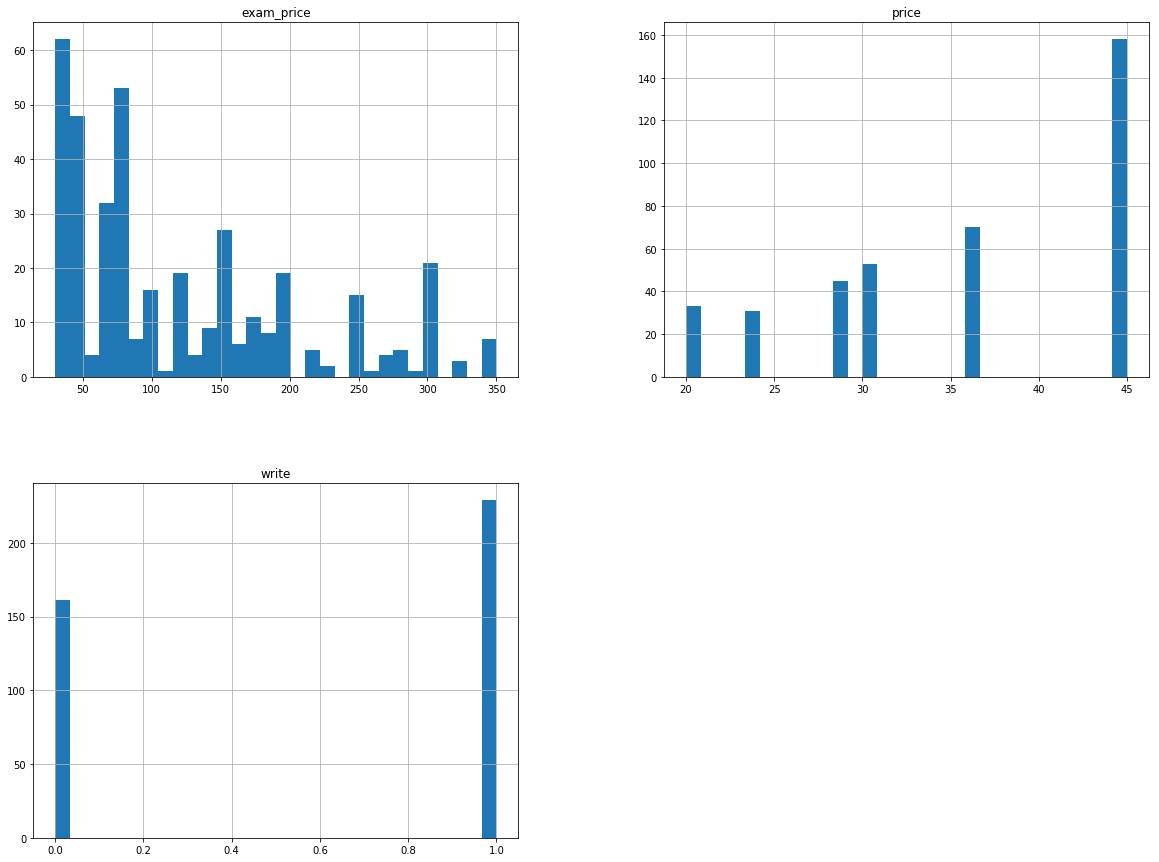

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
full_data.hist(bins=30, figsize=(20,15))
plt.show()

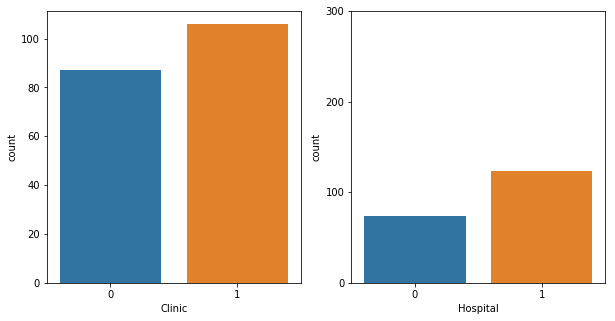

In [6]:
hospital=full_data[full_data["clinic_hos"] == "hospital"]
clinic=full_data[full_data["clinic_hos"] == "clinic"]
plt.figure(figsize = [10, 5])
# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.countplot( data=clinic, x='write')
plt.xlabel("Clinic");
plt.subplot(1, 2, 2)
sb.countplot(data=hospital,x ='write')
ylabel=np.arange(0,400,100)
plt.yticks(ylabel);
plt.xlabel("Hospital");

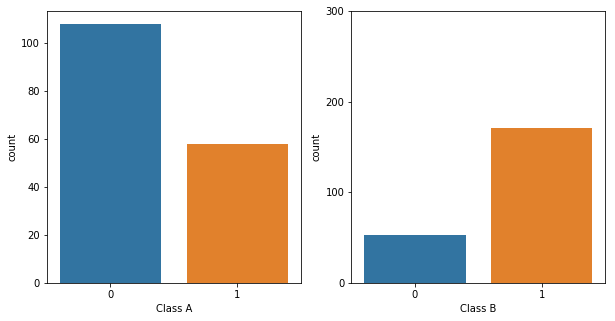

In [7]:
classA=full_data[full_data["dr_class"] == "a"]
classB=full_data[full_data["dr_class"] == "b"]
plt.figure(figsize = [10, 5])
# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.countplot( data=classA, x='write')
plt.xlabel("Class A");
plt.subplot(1, 2, 2)
sb.countplot(data=classB,x ='write')
ylabel=np.arange(0,400,100)
plt.yticks(ylabel);
plt.xlabel("Class B");

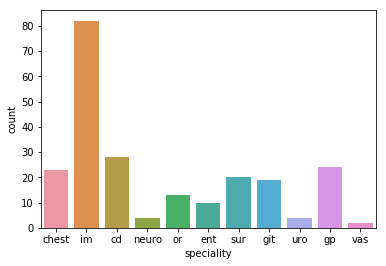

In [8]:
speciality_data_write=full_data[full_data["write"] == 1]
ord1=full_data[full_data["write"] == 1]
Plt = sns.countplot(x="speciality", data=speciality_data_write)

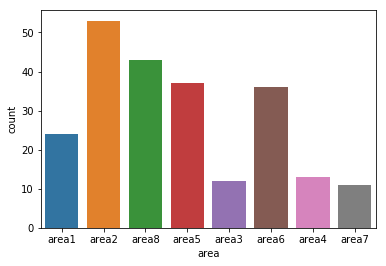

In [9]:
area_data_write=full_data[full_data["write"] == 1]
Plt = sns.countplot(x="area", data=area_data_write)

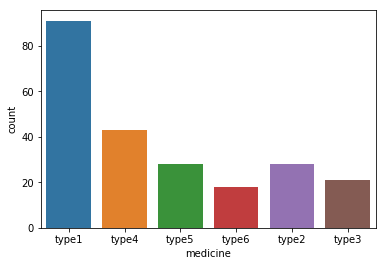

In [10]:
medicine_data_write=full_data[full_data["write"] == 1]
Plt = sns.countplot(x="medicine", data=medicine_data_write)

In [11]:
# TODO: Total number of records
n_records = full_data.shape[0]
# TODO: Number of records where individual's income is more than $50,000
n_Write =full_data[full_data["write"]==1].shape[0]


# TODO: Number of records where individual's income is at most $50,000
n_Not_Write =full_data[full_data["write"]==0].shape[0]


# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_Write/n_records)*100

# Print the results

print("Total number of records: {}".format(n_records))
print("Doctors who are Writing the Medicen: {}".format(n_Write))

print("Doctors who are not Writing the Medicen: {}".format(n_Not_Write))
print("Doctors who are Writing the Medicen: {}%".format(greater_percent))


Total number of records: 390
Doctors who are Writing the Medicen: 229
Doctors who are not Writing the Medicen: 161
Doctors who are Writing the Medicen: 58.71794871794872%


# Looking for Correlations
Now let’s look at how much each attribute correlates with the Writing label:

In [12]:
corr_matrix = full_data.corr()
corr_matrix["write"].sort_values(ascending=False)

write         1.000000
price        -0.015387
exam_price   -0.312110
Name: write, dtype: float64

As we see the values of the correlations ​​we can say that there is an inverse relation between the Exam_price and the chance of writing the Medicen in other word when the Exam_Price increase the chance of writing the Medicen will decrease

## Data preprocessing
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized

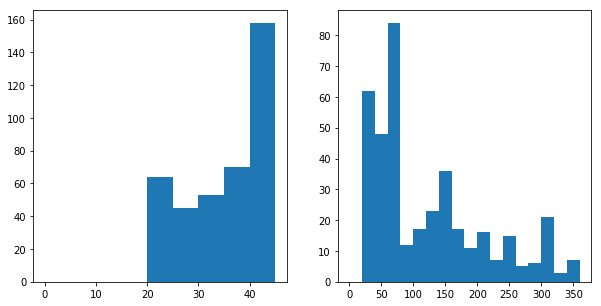

In [13]:
# Split the data into features and target label
write_raw = full_data['write']
features_raw = full_data.drop('write', axis = 1)

# Visualize skewed continuous features of original data
plt.figure(figsize = [10, 5])
# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins=np.arange(0,full_data['price'].max()+5,5)
plt.hist(data=full_data,x='price',bins=bins)

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins=np.arange(0,full_data['exam_price'].max()+20,20)
plt.hist(data=full_data,x='exam_price',bins=bins);


In [30]:
x=np.where(full_data["exam_price"]>350)          
#full_data['exam_price']
x.shape()

AttributeError: 'tuple' object has no attribute 'shape'

In [14]:
#features_raw['exam_price']= np.log(features_raw['exam_price']+1)
#features_raw['exam_price']

In [15]:
#bins=np.arange(0,full_data['exam_price'].max()+20,20)
#plt.hist(data=full_data,x='exam_price',bins=bins);
#features_raw['exam_price']

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'exam_price'` or  above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.



In [16]:
numerical = ['exam_price','price']

Max_cols =np.max(features_raw[numerical],axis=0)

features_raw[numerical] =(features_raw[numerical])/Max_cols
display(features_raw.head(n = 5))

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos
0,type1,area1,chest,1.000000,a,0.571429,clinic
1,type4,area2,im,0.800000,b,0.285714,clinic
2,type1,area8,chest,1.000000,a,0.214286,hospital
3,type1,area5,chest,1.000000,a,0.085714,hospital
4,type5,area6,uro,0.644444,a,0.628571,clinic


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |



In [17]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_raw)



# Print the number of features after one-hot encoding
print("{} total features after one-hot encoding.".format(features_final.shape[1]))

# Uncomment the following line to see the encoded feature names
display(features_final[0:10])

31 total features after one-hot encoding.


,price,exam_price,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,area_area1,area_area2,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,1.000000,0.571429,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.800000,0.285714,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2,1.000000,0.214286,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.000000,0.085714,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.644444,0.628571,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
5,0.644444,0.400000,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
6,0.444444,0.200000,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
7,0.800000,0.214286,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,0.666667,0.428571,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,0.666667,0.428571,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    write_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 312 samples.
Testing set has 78 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.



In [19]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP=np.sum(write_raw)
FP= n_records - TP
TN=0
FN=0
accuracy = TP/(TP+FP)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
 
# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore =(1+ beta**2)*(precision * recall)/((beta**2*precision)+recall) 


# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5872, F-score: 0.6400]


###  Supervised Learning Models

- Decision Trees
- Ensemble Methood
- Support Vector Machines (SVM)
- Logistic Regression

**Answer: **
- 1-Decision Trees
- 2-Ensemble Methods using  AdaBoost method
- 3-Support Vector Machines 

# 1-Decision Trees:
                                            



     Real world applications:
     ------------------------  

-         Energy consumption:
          ---------------------

concerns how much electricity has been used by individuals. The investigation of energy consumption becomes an important issue as it helps utility companies identify the amount of energy needed. Although many existing methods can be used for the investigation of energy consumption, decision trees appear to be preferred. This is due to the fact that a hierarchical structure provided by decision trees is useful to present the deep level of information and insight. For instance, Tso and Yau (2007) create a decision tree model to identify the relationships between a household and its electricity consumptions in Hong Kong. Findings from their tree model illustrate that the number of household members are the most determinant factor of energy consumption in summer, and both the number of air-conditioner and the size of a flat are the second most important factors. In addition to such findings, their tree model identifies that a household with four or more members with a flat size larger than 817 ft2 is the highest electricity consumption group. On the other hand, households which have less than four family members and without air-conditioners are the smallest electricity consumption group. Such findings from decision trees not only provide a deeper insight of the electricity consumptions within an area but also give guidelines to electricity companies about the right time they need to generate more electricity.[1]



 Strengths of Decision Trees:
------------------------------------------

- Decision trees implicitly perform variable screening or feature selection [2]
- Decision trees require relatively little effort from users for data preparation [2]
- Nonlinear relationships between parameters do not affect tree performance [2]
- The best feature of using trees for analytics - easy to interpret and explain to executives [2]
- Decision trees can handle both categorical and numerical variables at the same time as features. [5]


Weaknesses of Decision Trees :
----------------------------------------------

- They can be extremely sensitive to small perturbations in the data where a slight change can result in a drastically         different tree. [3]
- They can easily overfit. This can be negated by validation methods and pruning, but this is a grey area. [3]
- Need to discrete data for some particular construction algorithm [4]


What makes this model a good candidate for the problem ?
-------------------------------------------------------------------------------------
in my openion because of Decision trees can handle both categorical and numerical variables
Every split in a decision tree is based on a feature. If the feature is categorical, the split is done with the elements belonging to a particular class. If the feature is contiuous, the split is done with the elements higher than a threshold. At every split, the decision tree will take the best variable at that moment. This will be done according to an impurity measure with the splitted branches. And the fact that the variable used to do split is categorical or continuous is irrelevant (in fact, decision trees categorize contiuous variables by creating binary regions with the threshold).[5]

so i will not need alot of data preparation before buildong my model






References:
----------------

http://what-when-how.com/artificial-intelligence/decision-tree-applications-for-data-modelling-artificial-intelligence/ [1]

http://www.simafore.com/blog/bid/62333/4-key-advantages-of-using-decision-trees-for-predictive-analytics  [2]

https://stats.stackexchange.com/questions/1292/what-is-the-weak-side-of-decision-trees [3]

https://www.researchgate.net/post/What_are_pros_and_cons_of_decision_tree_versus_other_classifier_as_KNN_SVM_NN [4]

https://datascience.stackexchange.com/questions/32622/how-to-make-a-decision-tree-when-i-have-both-continous-and-categorical-variables [5]




2- Support Vector Machine
--------------------------------------

                  - Real world applications:
                  ---------------------------
                  
-                 Support Vector Machines Applied to Face Recognition
--------------------------------------------------------------------------
Face recognition is a K class problem, where K is the number of known individuals; and support vector machines (SVMs) are a binary classification method. By reformulating the face recognition problem and re-interpreting the output of the SVM classifier, we developed a SVM-based face recognition algorithm. The face recognition problem is formulated as a problem in difference space, which models dissimilarities between two facial images. [6]   



Strengths of  SVM :
----------------------------

- SVM works well in complicated domanis where there is a clear margin of sepration [7]
- this model is good with  high dimensional spaces(a lot of features)  [7]

Weaknesses of SVM :
-------------------------------

- SVM doesn't perfrom well in very large data sets because the training time happens to be cubic in the size of the data set[7]
- SVM doesn't perfrom well with a lot of noise[7]


What makes this model a good candidate for the problem ?
-------------------------------------------------------------------------------------
- sample size is not too small and at the same time is not too large so our data size is suitable for using SVM[7]
- it will work with a lot of features which we aready have [7]
- we can change kernel parameters to get the best model to test data

References:
----------------
https://www.nist.gov/publications/support-vector-machines-applied-face-recognition [6]

https://www.youtube.com/watch?v=U9-ZsbaaGAs [7]



3-Ensemble Methods using  AdaBoost method
-------------------------------------------------------------------



                  - Real world applications:
                  ---------------------------
- Application of AdaBoost Algorithm in Basketball Player Detection [8] 


Strengths of  AdaBoost :
------------------------------------

- simple models (weak learner)can be compined to build a better model(strong learner)[9]
- AdaBoost capture hard decision boundaries [9]
- AdaBoost can achieve similar classification results with much less tweaking of parameters [9]


Weaknesses of Adaboost :
-------------------------------

- AdaBoost can be sensitive to noisy data and outliers[9] 


What makes this model a good candidate for the problem ?
-------------------------------------------------------------------------------------

- it will give us strong quallity  specially our data is not so noisy

References:
----------------

https://www.uni-obuda.hu/journal/Markoski_Ivankovic_Ratgeber_Pecev_Glusac_57.pdf [8]

http://www.nickgillian.com/wiki/pmwiki.php/GRT/AdaBoost [9] 

### Implementation - Creating a Training and Predicting Pipeline

# Decision Tree

In [20]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
# TODO: import the three selcted models
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

Dec_Tree = DecisionTreeClassifier(random_state=42)
Dec_Tree.fit(X_train,y_train)


y_train_pred = Dec_Tree.predict(X_train)
y_test_pred = Dec_Tree.predict(X_test)

print('The training F0.5 Score for Dec_Tree is', fbeta_score(y_test, y_test_pred, average=None, beta=0.5))
print('The testing F0.5 Score for Dec_Tree is', fbeta_score(y_test, y_test_pred, average=None, beta=0.5))
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred )
print('The training accuracy for Dec_Tree is', train_accuracy)
print('The test accuracy for Dec_Tree is', test_accuracy)


The training F0.5 Score for Dec_Tree is [0.68027211 0.781893  ]
The testing F0.5 Score for Dec_Tree is [0.68027211 0.781893  ]
The training accuracy for Dec_Tree is 0.9134615384615384
The test accuracy for Dec_Tree is 0.7435897435897436


# AdaBoost


In [21]:
from sklearn.ensemble import AdaBoostClassifier
Boost = AdaBoostClassifier(random_state=42)
Boost.fit(X_train,y_train)
# Calculate the accuracy score for both the training  and testing set for AdaBoost model 
# Calculate the F-score for both the training subset and testing set for AdaBoost model 
y_train_pred = Boost.predict(X_train)
y_test_pred = Boost.predict(X_test)

print('The training F0.5 Score for AdaBoost is', fbeta_score(y_test, y_test_pred, average=None, beta=0.5))
print('The testing F0.5 Score for AdaBoost is', fbeta_score(y_test, y_test_pred, average=None, beta=0.5))
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred )
print('The training accuracy for Dec_Tree is', train_accuracy)
print('The test accuracy for Dec_Tree is', test_accuracy)

The training F0.5 Score for AdaBoost is [0.59259259 0.7254902 ]
The testing F0.5 Score for AdaBoost is [0.59259259 0.7254902 ]
The training accuracy for Dec_Tree is 0.782051282051282
The test accuracy for Dec_Tree is 0.6794871794871795


# Support Vector Machine


In [22]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train,y_train)
# Calculate the accuracy score for both the training  and testing set for SVM model 
# Calculate the F-score for both the training subset and testing set for SVM model 
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)

print('The training F0.5 Score for SVM is', fbeta_score(y_test, y_test_pred, average=None, beta=0.5))
print('The testing F0.5 Score for SVM is', fbeta_score(y_test, y_test_pred, average=None, beta=0.5))
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred )
print('The training accuracy for Dec_Tree is', train_accuracy)
print('The test accuracy for Dec_Tree is', test_accuracy)


The training F0.5 Score for SVM is [0.51851852 0.68627451]
The testing F0.5 Score for SVM is [0.51851852 0.68627451]
The training accuracy for Dec_Tree is 0.7564102564102564
The test accuracy for Dec_Tree is 0.6282051282051282


### Implementation: Model Tuning


In [23]:
# TODO: Train the model
model = DecisionTreeClassifier(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model.fit(X_train,y_train)
# TODO: Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# TODO: Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)


The training accuracy is 0.9134615384615384
The test accuracy is 0.7435897435897436


In [24]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, accuracy_score
# TODO: Initialize the classifier
print("step1")
clf = DecisionTreeClassifier(random_state=42)
print("step2")
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'max_depth':[10,11,12,13,14,15,16,17,18,19,20],'min_samples_leaf':[2,3,4,5], 'min_samples_split':[2,3,4,5]}
print("step3")
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)
print("step4")
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)
print("step5")
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit =grid_obj.fit(X_train, y_train) 
print("step6")
# Get the estimator
best_clf = grid_fit.best_estimator_
print("step7")
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
print("step8")
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
best_clf

step1
step2
step3
step4
step5
step6
step7
step8
Unoptimized model
------
Accuracy score on testing data: 0.7436
F-score on testing data: 0.7819

Optimized Model
------
Final accuracy score on the testing data: 0.7179
Final F-score on the testing data: 0.7570


DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, random_state=42)

# Implementing Testing Data

In [25]:
# Load the dataset
in_file = 'testing.txt'
test_data = pd.read_csv(in_file)
print(test_data.shape)
# Print the first few entries of the RMS Titanic data
display(test_data.head())
test_data=test_data
test_data=test_data.fillna(np.mean(test_data))

(30, 8)


,medicine,area,speciality,price,dr_class,exam_price,clinic_hos,write
0,type1,area1,chest,45,a,220,clinic,1
1,type1,area4,im,45,b,90,hospital,1
2,type1,area2,gp,45,b,60,hospital,1
3,type1,area3,im,45,a,180,clinic,0
4,type4,area8,chest,36,a,75,hospital,0


In [26]:
Write_raw = test_data['write']
features = test_data.drop('write', axis = 1)

In [28]:
numerical = ['exam_price','price']

Max_cols =np.max(features[numerical],axis=0)

features[numerical] =(features[numerical])/Max_cols
display(features.head(n = 5))

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos
0,type1,area1,chest,1.0,a,0.628571,clinic
1,type1,area4,im,1.0,b,0.257143,hospital
2,type1,area2,gp,1.0,b,0.171429,hospital
3,type1,area3,im,1.0,a,0.514286,clinic
4,type4,area8,chest,0.8,a,0.214286,hospital


In [29]:
features_final = pd.get_dummies(features)



# Print the number of features after one-hot encoding
print("{} total features after one-hot encoding.".format(features_final.shape[1]))

# Uncomment the following line to see the encoded feature names
display(features_final[0:10])

31 total features after one-hot encoding.


,price,exam_price,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,area_area1,area_area2,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,1.000000,0.628571,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1.000000,0.257143,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,1.000000,0.171429,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,1.000000,0.514286,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0.800000,0.214286,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,0.666667,0.428571,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0.666667,0.571429,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
7,0.666667,0.471429,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
8,0.666667,0.257143,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
9,1.000000,0.085714,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [30]:
print("Generate a prediction")
prediction = best_clf.predict(features_final)
print("prediction shape:", prediction.shape)

Generate a prediction
prediction shape: (30,)


In [32]:
for i, price in enumerate(prediction):
    print("Predicted Writing  the Medicen  for Doctors {}: {:}".format(i+1, price))

Predicted Writing  the Medicen  for Doctors 1: 1
Predicted Writing  the Medicen  for Doctors 2: 1
Predicted Writing  the Medicen  for Doctors 3: 1
Predicted Writing  the Medicen  for Doctors 4: 0
Predicted Writing  the Medicen  for Doctors 5: 0
Predicted Writing  the Medicen  for Doctors 6: 1
Predicted Writing  the Medicen  for Doctors 7: 0
Predicted Writing  the Medicen  for Doctors 8: 1
Predicted Writing  the Medicen  for Doctors 9: 0
Predicted Writing  the Medicen  for Doctors 10: 1
Predicted Writing  the Medicen  for Doctors 11: 1
Predicted Writing  the Medicen  for Doctors 12: 0
Predicted Writing  the Medicen  for Doctors 13: 1
Predicted Writing  the Medicen  for Doctors 14: 1
Predicted Writing  the Medicen  for Doctors 15: 1
Predicted Writing  the Medicen  for Doctors 16: 0
Predicted Writing  the Medicen  for Doctors 17: 1
Predicted Writing  the Medicen  for Doctors 18: 1
Predicted Writing  the Medicen  for Doctors 19: 0
Predicted Writing  the Medicen  for Doctors 20: 1
Predicted

In [33]:
#test_accuracy = accuracy_score(Write_raw,prediction )
#print('The test accuracy for Dec_Tree is', test_accuracy)
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Write_raw, prediction)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(Write_raw, prediction, beta = 0.5)))

Final accuracy score on the testing data: 0.8000
Final F-score on the testing data: 0.8163


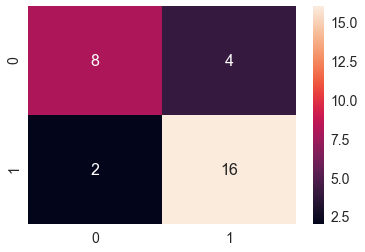

In [52]:
import seaborn as sn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
sn.set(font_scale=1.4) # for label size
matrix_confusion = confusion_matrix(Write_raw, prediction)
sn.heatmap(matrix_confusion, annot=True, annot_kws={"size": 16}) # font size

plt.show()